<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Build and Evaluate Your Models - Regression



---

> **Note**: this is intended to be a group work lab or a codealong with the instructor.


## Model Options

---

We now have a selection of models to utilize for your modeling practice session.



In [1]:
# Data science modules
import pandas as pd
import numpy as np

# Plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Modeling modules
from sklearn.model_selection import train_test_split ##Train test split your data
from sklearn.linear_model import LinearRegression ##Building a Linear Regressor
from sklearn.neighbors import KNeighborsRegressor #Building a KNN regressor
from sklearn.tree import DecisionTreeRegressor #Building a DT Regressor
from sklearn.ensemble import RandomForestRegressor #Building a RF Regression

# Evaluation modules
from sklearn import metrics

Example of creating a model

In [2]:
#from sklearn.linear_model import LinearRegression
#LR = LinearRegression()
#X = glass[['al']]
#y = glass.household

#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2)

#LR.fit(X_train,y_train)

#y_pred = LR.predict(X_test)

In [3]:
# Cheat Sheet Metrics
# RMSE
# np.sqrt(metrics.mean_squared_error(true_value, predicted_value))

# R2 Score
# metrics.r2_score(y_true, y_pred)

## Lab Instructions

---

Utilize the models you have access to for an evaluation of the hitters dataset. Your outcome variable will be your salary variable.

1. Import the hitters data
2. Do very minimal cleaning and create intial models for all three regressors. Choose at least three variables and let them all be numeric.
3. Evaluate your models with RMSE and R2 Score
4. Go back into your data and start to explore your variables (create at least three charts showing correlation, boxplots, scatter plots, etc.)
5. After you have done this EDA, will you keep your same variables? 
6. Create new models but this time choose a categorical variable to include. Create dummy variables for this categorial variable.'
7. Re-evaluate your models outputs

Bonus! Try to use a new metrics to evaluate on https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

- Major League Baseball player data from 1986-87: [data](https://github.com/justmarkham/DAT8/blob/master/data/hitters.csv), [data dictionary](https://cran.r-project.org/web/packages/ISLR/ISLR.pdf) (page 7)
- Each observation represents a player.
- **Goal:** Predict player salary.

In [10]:
path ='../data/hitters.csv'
hitters = pd.read_csv(path)

hitters.isnull().sum()
hitters.dropna(inplace=True)
hitters.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [11]:
hitters.dtypes

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

In [15]:
# Salary
feature_cols = ['Hits','HmRun','Years']
X = hitters[feature_cols]
y = hitters.Salary

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2)

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

np.sqrt(metrics.mean_squared_error(y_test, y_pred))


metrics.r2_score(y_true, y_pred)


ValueError: Found input variables with inconsistent numbers of samples: [263, 66]

In [14]:
KNN = KNeighborsRegressor()
KNN.fit(X_train,y_train)

y_predKNN = KNN.predict(X_test)

np.sqrt(metrics.mean_squared_error(y_test,y_predKNN))

344.8727615197981

In [16]:
metrics.r2_score(y_test,y_predKNN)

0.18060355591761446

In [18]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train,y_train)

y_predDTR = DTR.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test,y_predDTR)))
print(metrics.r2_score(y_test,y_predDTR))

342.93690193263177
0.18977670417207249


In [19]:
FR = RandomForestRegressor()
FR.fit(X_train,y_train)

y_predFR = FR.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test,y_predFR)))
print(metrics.r2_score(y_test,y_predFR))

308.05943020935587
0.3461994202811499


*The random forests model had the lowest RMSE and the highest R2 score.*

<AxesSubplot:>

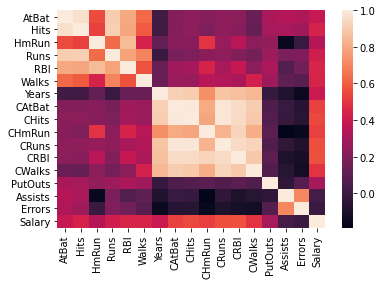

In [21]:
correlbaseball = hitters.corr()
sns.heatmap(correlbaseball)
# Will instead plot 

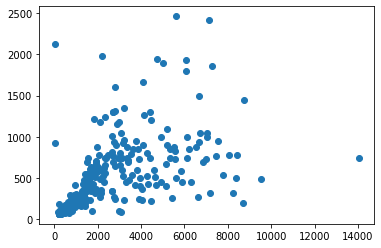

In [25]:
plt.scatter(hitters['CRuns'],hitters['Salary'])

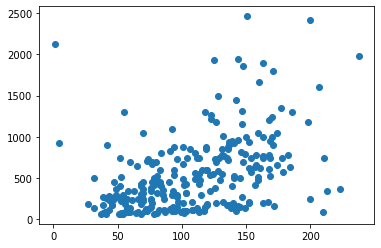

In [23]:
plt.scatter(hitters['Hits'],hitters['Salary'])

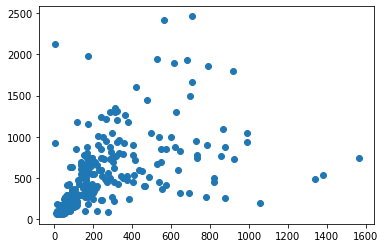

In [24]:
plt.scatter(hitters['CWalks'],hitters['Salary'])

In [32]:
hitters['LeagueType'] = hitters.League.map({'A':0,'B':1})
feature_cols = ['CRuns','Hits','LeagueType']
X2 = hitters[feature_cols]

In [33]:
lr2 = LinearRegression()

X24_train, X2_test, y_train, y_test = train_test_split(X2,y,random_state=2)

lr2.fit(X2_train,y2_train)

y2_pred = lr.predict(X2_test)

np.sqrt(metrics.mean_squared_error(y2_test, y2_pred))


metrics.r2_score(y2_true, y2_pred)


NameError: name 'y2_train' is not defined